In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from retrosheet import get_batting_results as gbr
from retrosheet import score_value_matrix as svm

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [ ]:
#打席情報
# df = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/play_by_play_2001-2019.csv', sep='\t')
df = pd.read_csv('../data/play_by_play_2001-2019.csv', sep='\t')
print(df.shape)
df.head()

In [148]:
#試合情報
df_games = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/games.csv', sep='\t')
print(df_games.shape)
df_games.head()

(46159, 15)


,game_dt,game_id,game_dy,away_team_id,home_team_id,away_score_ct,home_score_ct,park_id,attend_park_ct,minutes_game_ct,inn_ct,away_hits_ct,home_hits_ct,win_pit_id,lose_pit_id
0,20010401,TOR200104010,Sunday,TEX,TOR,1,8,SJU01,19891,194,9,9,13,loaie001,hellr001
1,20010402,BAL200104020,Monday,BOS,BAL,1,2,BAL12,46547,172,11,5,6,kohlr001,lowed001
2,20010402,CHN200104020,Monday,MON,CHN,5,4,CHI11,38466,207,10,10,9,lloyg001,fyhrm001
3,20010402,CIN200104020,Monday,ATL,CIN,10,4,CIN08,41901,187,9,14,8,valdm001,reyed001
4,20010402,CLE200104020,Monday,CHA,CLE,7,4,CLE08,42606,160,9,9,7,welld001,colob001


In [149]:
#プレイヤー情報
df_master = pd.read_csv('C:/Users/nukan/Desktop/work/25_Python/MLB_analysis/data/player_master.csv', sep=' ')
print(df_master.shape)
df_master.head()

(20093, 26)


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NaN,1981-12-27
2,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,2021-01-22,1934-02-05
3,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05
4,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN,1954-09-08
5,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,NaN,1972-08-25


In [150]:
#誕生月別の選手数
# tmp = df_master.groupby('birthMonth', as_index=False)['playerID'].count()
# print(tmp)
# tmp['playerID'].describe()

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

# ax.bar(tmp['birthMonth'], tmp['playerID'])

In [152]:
#ゲーム情報結合
print(df.shape)
df = pd.merge(df, df_games[['game_id', 'game_dt']], on='game_id')
print(df.shape)

df['game_dt'] = pd.to_datetime(df['game_dt'], format='%Y%m%d')
df['game_year'] = df['game_dt'].dt.strftime('%Y')

#日付とイニングで一意なID
df['game_dt_inn_id'] = df['game_dt'].dt.strftime('%Y%m%d') + df['inn_ct'].astype(str)

#プレイヤー情報結合
print(df.shape)
df = pd.merge(df, df_master[['retroID', 'birthYear']], left_on='bat_id', right_on='retroID')
print(df.shape)

#年齢
df['age'] = df['game_year'].astype(int) - df['birthYear']

#打席順にソート
df.sort_values(['game_dt', 'inn_ct', 'bat_home_id', 'outs_ct', 'inn_pa_ct'], inplace=True)

df.head()

(3650188, 34)
(3650188, 35)
(3650188, 37)
(3650188, 39)


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,balls_ct,strikes_ct,bat_lineup_id,event_tx,away_score_ct,home_score_ct,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,pitch_seq_tx,game_dt,game_year,game_dt_inn_id,retroID,birthYear,age
3626495,TOR200104010,1,0,0,0,2,1,1,HP,0,0,greer001,L,loaie001,0,16,T,F,F,F,0,1,NaN,NaN,NaN,0,0,0,0,NaN,NaN,0,0,CBBH,2001-04-01,2001,200104011,greer001,1969.0,32.0
3625829,TOR200104010,1,0,1,0,3,2,2,K+CS2(26)/DP/C,0,0,velar001,R,loaie001,1,3,T,T,F,F,0,0,greer001,NaN,NaN,0,0,0,2,NaN,NaN,0,0,CCBFFBBC,2001-04-01,2001,200104011,velar001,1962.0,39.0
1902939,TOR200104010,1,0,2,2,1,2,3,S7/7S,0,0,rodra001,R,loaie001,0,20,T,T,F,F,1,1,NaN,NaN,NaN,0,0,0,0,NaN,7S,7,0,BCFX,2001-04-01,2001,200104011,rodra001,1975.0,26.0
3448750,TOR200104010,1,0,3,2,0,1,4,D7.1-H,0,0,palmr001,L,loaie001,1,21,T,T,F,F,2,2,rodra001,NaN,NaN,4,0,0,0,NaN,NaN,7,1,CX,2001-04-01,2001,200104011,palmr001,1964.0,37.0
2411582,TOR200104010,1,0,4,2,0,1,5,8/F8D,1,0,rodri001,R,loaie001,2,2,T,T,F,F,0,0,NaN,palmr001,NaN,0,2,0,1,F,8D,8,0,CX,2001-04-01,2001,200104011,rodri001,1971.0,30.0


## 打撃成績の取得

In [153]:
#打撃成績の取得
df_results = gbr(df)

print(df_results.shape)
df_results.head()

(3536213, 56)


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,balls_ct,strikes_ct,bat_lineup_id,event_tx,away_score_ct,home_score_ct,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,pitch_seq_tx,game_dt,game_year,game_dt_inn_id,retroID,birthYear,age,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
3626495,TOR200104010,1,0,0,0,2,1,1,HP,0,0,greer001,L,loaie001,0,16,T,F,F,F,0,1,NaN,NaN,NaN,0,0,0,0,NaN,NaN,0,0,CBBH,2001-04-01,2001,200104011,greer001,1969.0,32.0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,1.0,NaN,NaN
3625829,TOR200104010,1,0,1,0,3,2,2,K+CS2(26)/DP/C,0,0,velar001,R,loaie001,1,3,T,T,F,F,0,0,greer001,NaN,NaN,0,0,0,2,NaN,NaN,0,0,CCBFFBBC,2001-04-01,2001,200104011,velar001,1962.0,39.0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0
1902939,TOR200104010,1,0,2,2,1,2,3,S7/7S,0,0,rodra001,R,loaie001,0,20,T,T,F,F,1,1,NaN,NaN,NaN,0,0,0,0,NaN,7S,7,0,BCFX,2001-04-01,2001,200104011,rodra001,1975.0,26.0,1,1,0,0,0,1,1,0,0,0,0,0,1.0,1.0,1.0,2.0
3448750,TOR200104010,1,0,3,2,0,1,4,D7.1-H,0,0,palmr001,L,loaie001,1,21,T,T,F,F,2,2,rodra001,NaN,NaN,4,0,0,0,NaN,NaN,7,1,CX,2001-04-01,2001,200104011,palmr001,1964.0,37.0,1,0,1,0,0,1,2,1,0,0,0,0,1.0,1.0,2.0,3.0
2411582,TOR200104010,1,0,4,2,0,1,5,8/F8D,1,0,rodri001,R,loaie001,2,2,T,T,F,F,0,0,NaN,palmr001,NaN,0,2,0,1,F,8D,8,0,CX,2001-04-01,2001,200104011,rodri001,1971.0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [154]:
#バッター、ゲーム日、イニングで一意なID
# df_results['bat_game_dt_inn_id'] = df_results['bat_id'] + df_results['game_dt_inn_id']
# df_results.head()

In [155]:
#シーズンごとに最終打席を取得
last_play_by_season = df_results.groupby(['game_year', 'bat_id'], as_index=False)['game_dt_inn_id'].max()
print(last_play_by_season.shape)

df_results_fin = pd.merge(df_results, last_play_by_season, on=['bat_id', 'game_dt_inn_id'])
print(df_results_fin.shape)
df_results_fin

(18223, 3)
(18305, 57)


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,balls_ct,strikes_ct,bat_lineup_id,event_tx,away_score_ct,home_score_ct,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,pitch_seq_tx,game_dt,game_year_x,game_dt_inn_id,retroID,birthYear,age,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops,game_year_y
0,CHN200104020,9,0,2,1,1,2,8,46(1)3/GDP,4,4,marta002,L,fassj001,1,2,T,T,F,F,0,0,cabro001,NaN,NaN,0,0,0,2,G,NaN,4,0,CSBX,2001-04-02,2001,200104029,marta002,1970.0,31.0,1,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,2001
1,COL200104040,4,0,0,0,0,0,9,8/F8,3,12,hutcc001,R,neagd001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,F,8,8,0,X,2001-04-04,2001,200104044,hutcc001,1977.0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,2001
2,HOU200104040,12,0,3,2,1,1,9,8/F8,6,5,leskc001,R,powej001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,F,8,8,0,BCX,2001-04-04,2001,2001040412,leskc001,1968.0,33.0,1,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,2001
3,PHI200104070,7,0,6,2,0,2,7,K,7,4,heref001,L,orope001,3,3,T,T,F,F,0,0,zulej001,gutir001,NaN,1,2,0,1,NaN,NaN,0,0,CSS,2001-04-07,2001,200104077,heref001,1975.0,26.0,1,0,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,2001
4,NYA200104080,6,1,6,2,3,2,5,4/P4,5,15,seabs001,R,plesd001,3,2,T,T,F,F,0,0,willb002,colem001,NaN,1,2,0,1,P,4,4,0,BBFCBFX,2001-04-08,2001,200104086,seabs001,1975.0,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18300,COL201909290,11,0,2,0,1,0,1,HP,3,3,nottj001,R,almoy001,6,16,T,F,F,F,0,1,NaN,taylt002,gameb001,0,2,3,0,NaN,NaN,0,0,.BH,2019-09-29,2019,2019092911,nottj001,1995.0,24.0,6,1,0,0,1,2,5,4,0,1,0,2,0.333,0.429,0.833,1.262,2019
18301,NYN201909290,11,1,2,1,0,1,9,S67/G.1-2,6,4,ramow001,R,swara001,1,20,T,T,F,F,1,1,guill001,NaN,NaN,2,0,0,0,G,NaN,6,0,..CX,2019-09-29,2019,2019092911,ramow001,1987.0,32.0,473,103,19,0,14,136,197,73,44,4,3,69,0.288,0.351,0.416,0.767,2019
18302,NYN201909290,11,1,3,1,2,2,1,K,6,4,river003,R,swara001,3,3,T,T,F,F,0,0,ramow001,guill001,NaN,1,2,0,1,NaN,NaN,0,0,.CBBSFFS,2019-09-29,2019,2019092911,river003,1983.0,36.0,17,3,0,0,1,4,7,3,3,0,0,4,0.235,0.350,0.412,0.762,2019
18303,NYN201909290,11,1,4,2,1,0,2,HR/89/F.2-H;1-H,6,4,smitd008,L,daytg001,3,23,T,T,F,F,4,4,lagaj001,guill001,NaN,4,4,0,0,F,89,0,3,..*BX,2019-09-29,2019,2019092911,smitd008,1995.0,24.0,177,29,10,0,11,50,93,25,19,1,0,44,0.282,0.355,0.525,0.880,2019


In [156]:
#イチローで検算
df_results_fin[df_results_fin['bat_id']=='suzui001']

,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,balls_ct,strikes_ct,bat_lineup_id,event_tx,away_score_ct,home_score_ct,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,pitch_seq_tx,game_dt,game_year_x,game_dt_inn_id,retroID,birthYear,age,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops,game_year_y
827,SEA200110070,8,1,1,1,3,2,1,K,3,3,suzui001,L,michc001,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0,BCFFBBFS,2001-10-07,2001,200110078,suzui001,1973.0,28.0,692,192,34,8,8,242,316,69,30,8,4,53,0.350,0.381,0.457,0.838,2001
1785,ANA200209290,8,0,4,2,0,2,1,K,6,7,suzui001,L,lukam001,3,3,T,T,F,F,0,0,cirij001,bordp001,NaN,1,2,0,1,NaN,NaN,0,0,CSS,2002-09-29,2002,200209298,suzui001,1973.0,29.0,647,165,27,8,8,208,275,51,68,5,5,62,0.321,0.388,0.425,0.813,2002
2684,SEA200309280,7,1,3,2,0,2,1,2/P2F,3,9,suzui001,L,hardr001,1,2,T,T,F,F,0,0,wilsd001,NaN,NaN,1,0,0,1,P,2F,2,0,CFX,2003-09-28,2003,200309287,suzui001,1973.0,30.0,679,162,29,8,13,212,296,62,36,6,1,69,0.312,0.352,0.436,0.788,2003
3723,SEA200410030,8,1,0,0,2,2,1,S8/L,3,0,suzui001,L,shoub001,0,20,T,T,F,F,1,1,NaN,NaN,NaN,0,0,0,0,L,NaN,8,0,.BFFFBFX,2004-10-03,2004,200410038,suzui001,1973.0,31.0,704,225,24,5,8,262,320,60,49,4,3,63,0.372,0.414,0.455,0.869,2004
4709,SEA200510020,8,1,2,2,0,2,1,K,8,3,suzui001,L,duchj001,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0,CCFFS,2005-10-02,2005,200510028,suzui001,1973.0,32.0,679,158,21,12,15,206,296,68,48,4,6,66,0.303,0.350,0.436,0.786,2005
5604,SEA200610010,8,1,0,0,2,2,1,K,2,3,suzui001,L,franf001,0,3,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,NaN,NaN,0,0,.BBCFS,2006-10-01,2006,200610018,suzui001,1973.0,33.0,695,186,20,9,9,224,289,49,49,5,2,71,0.322,0.370,0.416,0.786,2006
6470,SEA200709300,7,1,1,1,1,0,1,43/G,2,4,suzui001,L,mendl001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,4,0,BX,2007-09-30,2007,200709307,suzui001,1973.0,34.0,678,203,22,7,6,238,292,68,49,3,2,77,0.351,0.396,0.431,0.827,2007
7426,SEA200809280,7,1,0,0,2,2,1,S6/G,3,4,suzui001,L,blevj001,0,20,T,T,F,F,1,1,NaN,NaN,NaN,0,0,0,0,G,NaN,6,0,.CBBCX,2008-09-28,2008,200809287,suzui001,1973.0,35.0,686,180,20,7,6,213,265,42,51,5,4,65,0.310,0.361,0.386,0.747,2008
8403,SEA200910040,7,1,2,1,3,2,1,K,3,4,suzui001,L,odayd001,2,3,T,T,F,F,0,0,NaN,wilsj003,NaN,0,2,0,1,NaN,NaN,0,0,BBFBSS,2009-10-04,2009,200910047,suzui001,1973.0,36.0,639,179,31,4,11,225,297,46,32,4,1,71,0.352,0.386,0.465,0.851,2009
9593,SEA201010030,9,1,3,2,2,0,1,7/F,4,3,suzui001,L,bresc001,2,2,T,T,F,F,0,0,NaN,halmg001,NaN,0,2,0,1,F,NaN,7,0,BBX,2010-10-03,2010,201010039,suzui001,1973.0,37.0,680,175,30,3,6,214,268,43,45,3,1,86,0.315,0.359,0.394,0.753,2010


### OPSの年齢別推移

In [157]:
#22歳から35歳まで打席に立った選手
df_results_fin_bet = df_results_fin[(df_results_fin['age']>=22) & (df_results_fin['age']<=35)]
print('22歳から35歳まで打席に立った選手の打席：{}'.format(df_results_fin_bet.shape[0]))

#総打席数が4000打席以上
ab =  df_results_fin_bet.groupby('bat_id', as_index=False)['ab_cum'].sum()
ab = ab[ab['ab_cum']>=6500]

df_results_fin_bet = pd.merge(df_results_fin_bet, ab, on='bat_id')
print('上記のうち、総打席数が6500打席以上：{}'.format(df_results_fin_bet.shape[0]))

#12年すべてで打席に立った選手
cnt_bet = df_results_fin_bet.groupby('bat_id', as_index=False)['age'].count()
cnt_bet = cnt_bet[cnt_bet['age']==14]

df_results_fin_bet = pd.merge(df_results_fin_bet, cnt_bet, on='bat_id')
print('上記のうち、12年間毎年打席に立っている：{}'.format(df_results_fin_bet.shape[0]))
df_results_fin_bet.head()

22歳から35歳まで打席に立った選手の打席：16849
上記のうち、総打席数が6500打席以上：270
上記のうち、12年間毎年打席に立っている：140


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,balls_ct,strikes_ct,bat_lineup_id,event_tx,away_score_ct,home_score_ct,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,pitch_seq_tx,game_dt,game_year_x,game_dt_inn_id,retroID,birthYear,age_x,ab_cum_x,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops,game_year_y,ab_cum_y,age_y
0,SFN200110070,8,0,3,2,1,0,2,64(1)/FO,1,2,belta001,R,rodrf002,1,2,T,T,F,F,0,1,chrim002,NaN,NaN,0,0,0,1,G,NaN,6,0,BX,2001-10-07,2001,200110078,belta001,1979.0,22.0,475,87,22,4,13,126,195,60,28,5,5,82,0.265,0.310,0.411,0.721,2001,7902,14
1,LAN200209280,6,1,8,2,2,2,6,8/F8,2,12,belta001,R,fikaj001,7,2,T,T,F,F,0,0,cabrj002,grees001,lodup001,1,2,3,1,F,8,8,0,BCBSX,2002-09-28,2002,200209286,belta001,1979.0,23.0,587,99,26,5,21,151,250,75,37,4,6,96,0.257,0.303,0.426,0.729,2002,7902,14
2,SFN200309280,7,0,3,2,1,2,5,K,3,10,belta001,R,lowrn001,1,3,T,T,F,F,0,0,ventr001,NaN,NaN,1,0,0,1,NaN,NaN,0,0,FFBS,2003-09-28,2003,200309287,belta001,1979.0,24.0,559,79,30,2,23,134,237,80,37,5,6,103,0.240,0.290,0.424,0.714,2003,7902,14
3,LAN200410030,1,1,3,2,1,2,4,K,2,0,belta001,R,schmj001,1,3,T,T,F,F,0,0,finls001,NaN,NaN,1,0,0,1,NaN,NaN,0,0,CSFBFS,2004-10-03,2004,200410031,belta001,1979.0,25.0,598,120,32,0,48,200,376,121,53,2,4,87,0.334,0.388,0.629,1.017,2004,7902,14
4,SEA200510020,7,1,0,0,3,1,5,63/G,3,3,belta001,R,kennj001,0,2,T,T,F,F,0,0,NaN,NaN,NaN,0,0,0,1,G,NaN,6,0,BFBBX,2005-10-02,2005,200510027,belta001,1979.0,26.0,603,98,36,1,19,154,249,87,38,5,4,108,0.255,0.303,0.413,0.716,2005,7902,14


In [158]:
df_results_fin_bet_piv = pd.pivot_table(df_results_fin_bet, values='ops', index='bat_id', columns='age_x')
df_results_fin_bet_piv.fillna(0, inplace=True)
df_results_fin_bet_piv

age_x,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0
bat_id,,,,,,,,,,,,,,
belta001,0.721,0.729,0.714,1.017,0.716,0.793,0.801,0.7840,0.683,0.918,0.892,0.920,0.880,0.880
cabrm001,0.946,0.998,0.966,0.886,0.944,1.042,1.034,0.9990,1.079,0.895,0.974,0.956,0.728,0.848
canor001,0.000,0.778,0.890,0.841,0.714,0.872,0.915,0.8820,0.929,0.899,0.836,0.780,0.883,0.791
dunna001,0.949,0.854,0.808,0.957,0.927,0.855,0.940,0.8990,0.927,0.892,0.569,0.801,0.762,0.752
gonza003,0.654,0.679,0.862,0.849,0.871,0.957,0.904,0.9580,0.807,0.803,0.817,0.830,0.784,0.642
longe001,0.000,0.874,0.890,0.880,0.844,0.896,0.841,0.7240,0.764,0.839,0.737,0.693,0.762,0.000
mauej001,0.783,0.936,0.806,0.864,1.033,0.871,0.728,0.8620,0.880,0.732,0.718,0.752,0.801,0.730
philb001,0.553,0.547,0.000,0.751,0.816,0.752,0.776,0.7620,0.810,0.750,0.706,0.678,0.723,0.736
pujoa001,0.955,1.106,1.072,1.039,1.102,0.997,1.115,1.1030,1.010,0.907,0.859,0.767,0.790,0.787


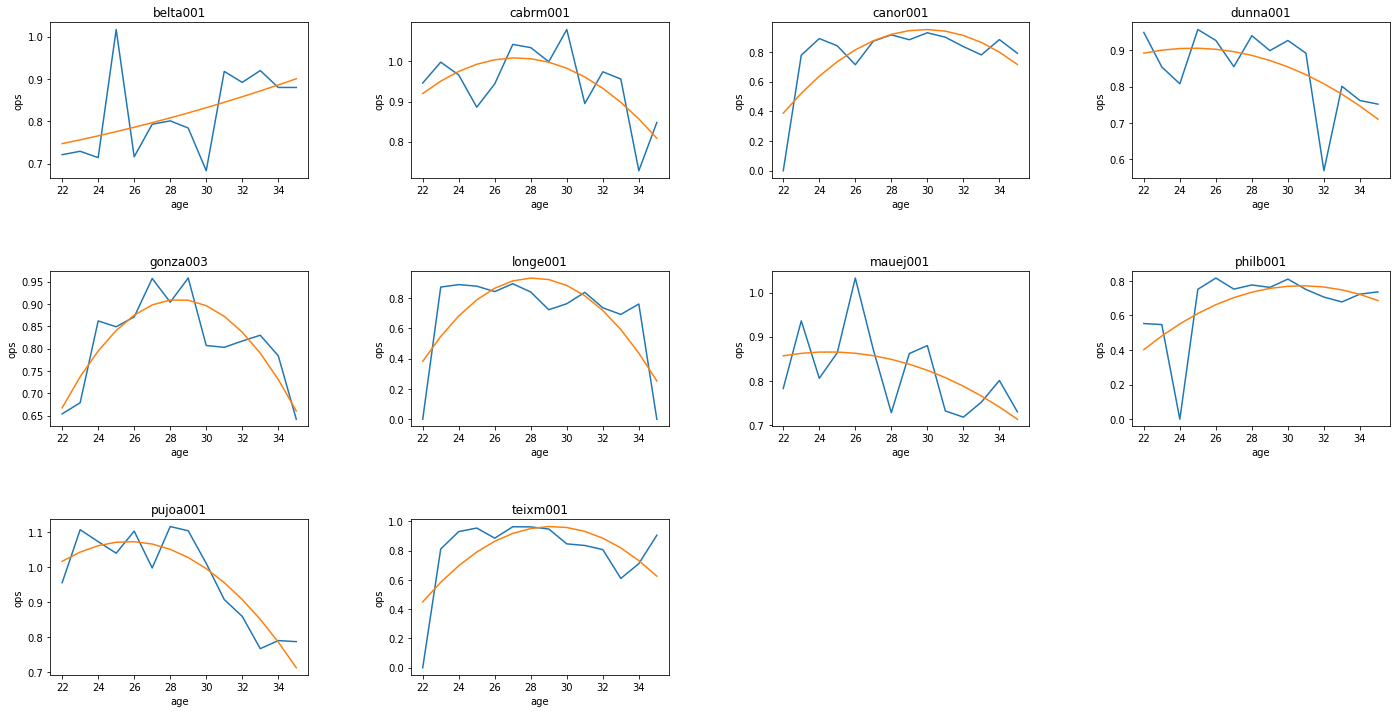

In [159]:
##多項式で近似
from scipy import optimize
# 2次式の近似
def func_c2(x, a, b, c):
    return a*(x-30)**2 + b*(x-30) + c

fig = plt.figure(figsize=(24, 12))
for i, batter in enumerate(df_results_fin_bet_piv.index.values):
    ax = fig.add_subplot(3, 4, i+1)
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    
    #OPSの推移（実績）をプロット
    ax.plot(df_results_fin_bet_piv.columns.values, df_results_fin_bet_piv[df_results_fin_bet_piv.index==batter].values[0])
    
    #二次曲線で近似
    res_c2 = optimize.curve_fit(
        func_c2, 
        df_results_fin_bet_piv.columns.values, 
        df_results_fin_bet_piv[df_results_fin_bet_piv.index==batter].values[0]
    )
    
    x = df_results_fin_bet_piv.columns.values
    ax.plot(df_results_fin_bet_piv.columns.values, res_c2[0][0]*(x-30)**2 + res_c2[0][1]*(x-30) + res_c2[0][2])
    
    ax.set_title(batter)
    ax.set_xlabel('age', fontsize=10)
    ax.set_ylabel('ops', fontsize=10)
    
    

In [160]:
df_results_fin_bet_piv.index.values

array(['belta001', 'cabrm001', 'canor001', 'dunna001', 'gonza003',
       'longe001', 'mauej001', 'philb001', 'pujoa001', 'teixm001'],
      dtype=object)

#### 得点価値

In [161]:
print(df_results.shape)
df_results.head()

(3536213, 56)


,game_id,inn_ct,bat_home_id,inn_pa_ct,outs_ct,balls_ct,strikes_ct,bat_lineup_id,event_tx,away_score_ct,home_score_ct,bat_id,resp_bat_hand_cd,pit_id,start_bases_cd,event_cd,bat_event_fl,ab_fl,sf_fl,bunt_fl,h_cd,bat_dest_id,base1_run_id,base2_run_id,base3_run_id,run1_dest_id,run2_dest_id,run3_dest_id,event_outs_ct,battedball_cd,battedball_loc_tx,fld_cd,rbi_ct,pitch_seq_tx,game_dt,game_year,game_dt_inn_id,retroID,birthYear,age,ab_cum,single_cum,double_cum,triple_cum,homerun_cum,hit_cum,base_hit_cum,rbi_cum,walk_cum,dead_cum,sf_cum,stout_cum,bat_ave_cum,on_base_cum,slug_cum,ops
3626495,TOR200104010,1,0,0,0,2,1,1,HP,0,0,greer001,L,loaie001,0,16,T,F,F,F,0,1,NaN,NaN,NaN,0,0,0,0,NaN,NaN,0,0,CBBH,2001-04-01,2001,200104011,greer001,1969.0,32.0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,1.0,NaN,NaN
3625829,TOR200104010,1,0,1,0,3,2,2,K+CS2(26)/DP/C,0,0,velar001,R,loaie001,1,3,T,T,F,F,0,0,greer001,NaN,NaN,0,0,0,2,NaN,NaN,0,0,CCBFFBBC,2001-04-01,2001,200104011,velar001,1962.0,39.0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0
1902939,TOR200104010,1,0,2,2,1,2,3,S7/7S,0,0,rodra001,R,loaie001,0,20,T,T,F,F,1,1,NaN,NaN,NaN,0,0,0,0,NaN,7S,7,0,BCFX,2001-04-01,2001,200104011,rodra001,1975.0,26.0,1,1,0,0,0,1,1,0,0,0,0,0,1.0,1.0,1.0,2.0
3448750,TOR200104010,1,0,3,2,0,1,4,D7.1-H,0,0,palmr001,L,loaie001,1,21,T,T,F,F,2,2,rodra001,NaN,NaN,4,0,0,0,NaN,NaN,7,1,CX,2001-04-01,2001,200104011,palmr001,1964.0,37.0,1,0,1,0,0,1,2,1,0,0,0,0,1.0,1.0,2.0,3.0
2411582,TOR200104010,1,0,4,2,0,1,5,8/F8D,1,0,rodri001,R,loaie001,2,2,T,T,F,F,0,0,NaN,palmr001,NaN,0,2,0,1,F,8D,8,0,CX,2001-04-01,2001,200104011,rodri001,1971.0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [165]:
# df_results_fil = df_results[df_results['bat_id'].isin(df_results_fin_bet_piv.index.values)]
df_results_score = pd.merge(df_results, cnt_bet, on='bat_id')
print(df_results_score.shape)
df_results_score.head()

#得点価値の付与
df_results_score = svm(df_results_score)
print(df_results_score.shape)
df_results_score.head()

#各選手の得点価値合計
df_results_score.groupby('bat_id')['run_value'].mean()

(89981, 57)
(89981, 60)


bat_id
belta001    0.201242
cabrm001    0.209160
canor001    0.176249
dunna001    0.207502
gonza003    0.200809
longe001    0.180510
mauej001    0.124646
philb001    0.177935
pujoa001    0.209711
teixm001    0.210335
Name: run_value, dtype: float64